In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


In [ ]:

def clahe(image_dir='/content/drive/MyDrive/val',
          mask_dir='/content/drive/MyDrive/yolact_val',
          save_dir='/content/drive/MyDrive/clahe_1channel_val'):
  if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

  clahe_object = cv2.createCLAHE(clipLimit=5, tileGridSize=(7, 7))

  for filename in tqdm(os.listdir(image_dir)):
    if filename.endswith('txt'):
      with open(os.path.join(image_dir, filename), 'r') as rf,\
       open(os.path.join(save_dir, filename), 'w') as wf:
        data = rf.readlines()
        wf.writelines(data)
    else:
      image_path = os.path.join(image_dir, filename)
      mask_path = os.path.join(mask_dir, filename)
      save_path = os.path.join(save_dir, filename)

      image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
      mask[mask > 0] = 1

      image = image * mask
      image = clahe_object.apply(image)
      
      final_image = np.zeros((3, image.shape[0], image.shape[1]))
      final_image[0] = image
      final_image[1] = image
      final_image[2] = image

      cv2.imwrite(save_path, image)
        

clahe()

100%|██████████| 3264/3264 [19:06<00:00,  2.85it/s]


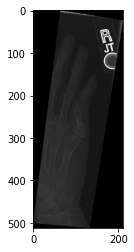

In [6]:
image = cv2.imread('/content/drive/MyDrive/train/finger2_patient03335_image2.png')
plt.imshow(image)

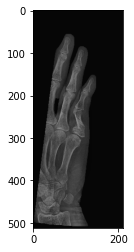

In [7]:
image = cv2.imread('/content/drive/MyDrive/clahe_1channel_train/finger2_patient03335_image2.png')
plt.imshow(image)